Тестовое задание BST Владимир Четвериков

Ваш клиент - сеть небольших продуктовых магазинов, сейчас она насчитывает около 500 торговых точек. В ходе проекта вы с коллегами разработали модель, предсказывающую будущую выручку открываемого магазина и валидировали ее на исторических данных. Во вложенном эксель файле у вас имеется по всем магазинам обучающей выборки:

    1) id магазина
    2) прогнозная среднемесячная выручка магазина
    3) фактическая среднемесячная выручка магазина

Необходимо ответить на ряд вопросов.



Перед нами задача предсказания прибыли нового магазина. По сути эта задача регрессии, решаемая при помощи линейной регрессии и  метода наименьших квадратов (МНК). Для того, чтобы решения полученное на МНК было лучшим к классе линейных несмещенных оценок, необходимо выполнения ряда условий (условий Гаусса-Макрова) об этом в пункте 2.

Перейдем к подготовке данных для анализа.

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn import metrics
import scipy as sc
import numpy as np
import seaborn as sns

In [2]:
# Загрузим исходные данный из excel в dataframe с ним удобнее работать
df = pd.ExcelFile('Задача_оценка_точности_модели.xlsx')
df = df.parse('Лист1')

In [3]:
df

,id_магазина,Прогноз,Факт
0,1,1755111,1953215
1,2,2149982,2524643
2,3,1927028,1658233
3,4,2674539,2624566
4,5,1370501,1274504
...,...,...,...
523,524,3121961,1447054
524,525,1655969,1877632
525,526,2286985,2501015
526,527,578786,491388


### Вопрос 1. Насколько точная получилась модель? Как это можно оценить?

Ответ: Для расчета точности модели нам понадобится знать какова ошибка предсказания нашей модели. Вариантов подсчета ошибки множество, например, RMSE, MAE, или их нормализованные/процентные варианты.   
Точность модели будет определяться, по формуле 

Точность(%) = 100% - ошибка(%)

In [4]:
# Введем для упрощения записи переменные y_true и y_pred,
# отвечающие за фактическое и предсказанное значение соответственно
y_true = df['Факт']
y_pred = df['Прогноз']
res = y_true - y_pred

Рассмотрим вариант с оценкой точности с использованием Mean Absolute Error

In [5]:
# расчет MAE
mae = mean_absolute_error(y_true, y_pred)
# расчет MAPE процентного варианта
mape = mae / y_true.mean()
# расчет точности
accuracy_mae = 100 - mape * 100

print(f'Вариант MAE: \nОшибка модели {round(mape*100,2)}% \nТочность модели {round(accuracy_mae,2)}%') 

Вариант MAE: 
Ошибка модели 18.15% 
Точность модели 81.85%


Рассмотрим вариант с оценкой точности с использованием Mean Absolute Error

In [6]:
# расчет RMSE
rmse = mean_squared_error(y_true, y_pred, squared=False)
# расчет MAPE процентного варианта
norm_rmse = rmse / y_true.mean()
# расчет точности
accuracy_rmse = 100 - norm_rmse * 100
# расчет коэффициент детерминации R^2
r2 = r2_score(y_true, y_pred)

print(f'Вариант RMSE: \nОшибка модели {round(norm_rmse*100,2)}% \n\
Точность модели {round(accuracy_rmse,2)}% \nКоэффициет детерминации {r2}')

Вариант RMSE: 
Ошибка модели 26.25% 
Точность модели 73.75% 
Коэффициет детерминации 0.7446608659107834


Небольшой вывод:

Заметим, что оценка точности модели очень сильно зависит от метода ее оценки, точнее оценки ошибки предсказания.
Я рассмотрел два наиболее классических подхода: вычисление ошибки по абсолютному отклонени и по методу МНК. 

### Вопрос 2.  Можно ли что-то сказать о границах применимости полученной модели?

Проверим условия Гаусса-Маркова для линейной регрессии

Предположения накладываемые на исходные данные, используемые при построении модели проверить не предствляется возможным, но можно попробовать выдать рекомендации по улучшению их структуры.

Проверим выполняется ли линейность модели.

Для этого построим графики зависимости реальной и спрогнозируемой величины или график зависимости остатков от прогноза. Желаемый результат состоит в том, что точки симметрично распределены вокруг диагональной линии на первом графике или вокруг горизонтальной линии на последнем. В обоих случаях с примерно постоянной дисперсией.

[Text(0, 0.5, 'Остатки'), Text(0.5, 0, 'Предсказанное')]

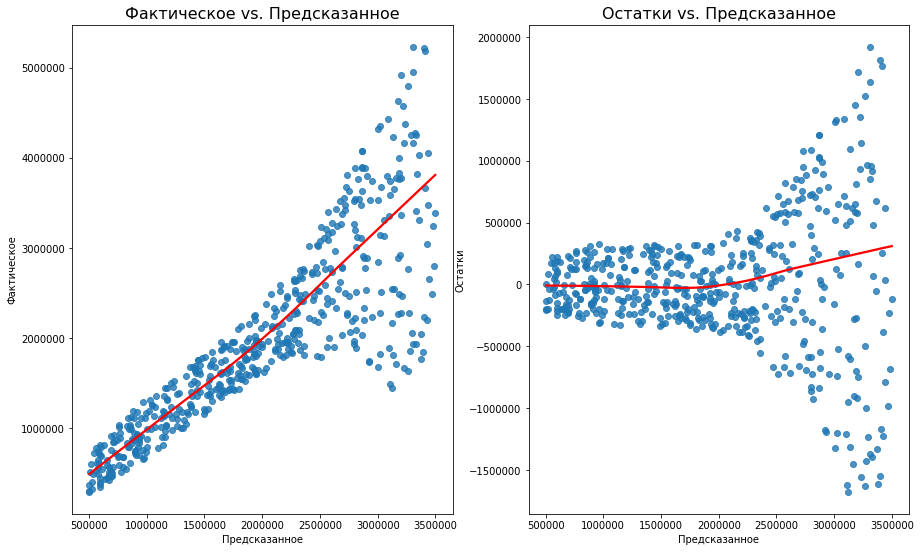

In [7]:
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)  
fig, ax = plt.subplots(1,2)
 
sns.regplot(x=y_pred, y=y_true, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Фактическое vs. Предсказанное', fontsize=16)
ax[0].set(xlabel='Предсказанное', ylabel='Фактическое')

sns.regplot(x=y_pred, y=res, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Остатки vs. Предсказанное', fontsize=16)
ax[1].set(xlabel='Предсказанное', ylabel='Остатки')

Предположение о линейности не выполняется. Особенно это заметно на величинах более 2000000. 



Матожидание остатков равно 0? E(res)=0?

In [8]:
res = y_true - y_pred

In [9]:
res.mean()

5905.895833333333

Распределение остатков QQ-plot

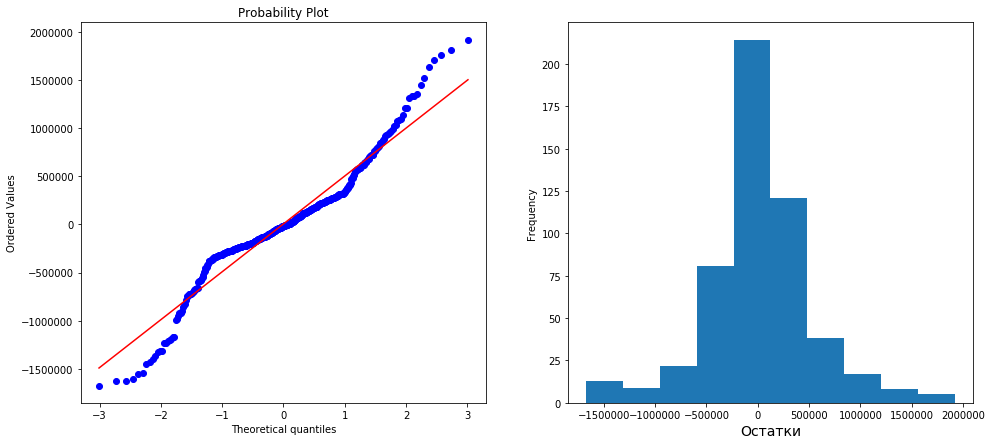

In [10]:
plt.figure(figsize=(16,7))
plt.subplot(121)
sc.stats.probplot(res, dist="norm", plot=plt)
plt.subplot(122)
res.plot.hist()
plt.xlabel('Остатки', fontsize=14)
plt.show()

Распределение остатков явно имеет не нормальное распределение, хотя и стремиться к нему. 

Возможные пути решения: 
    - нелинейное преобразования целевой переменной или исходных признаков,
    - обработка подозрительных значений/ выбросов 

Проверим предположение о гомоскедантичности остатков, построив график остатков от предсказанных значений. Проверить критерий  Бреуша-Пагана не представляется возможным.

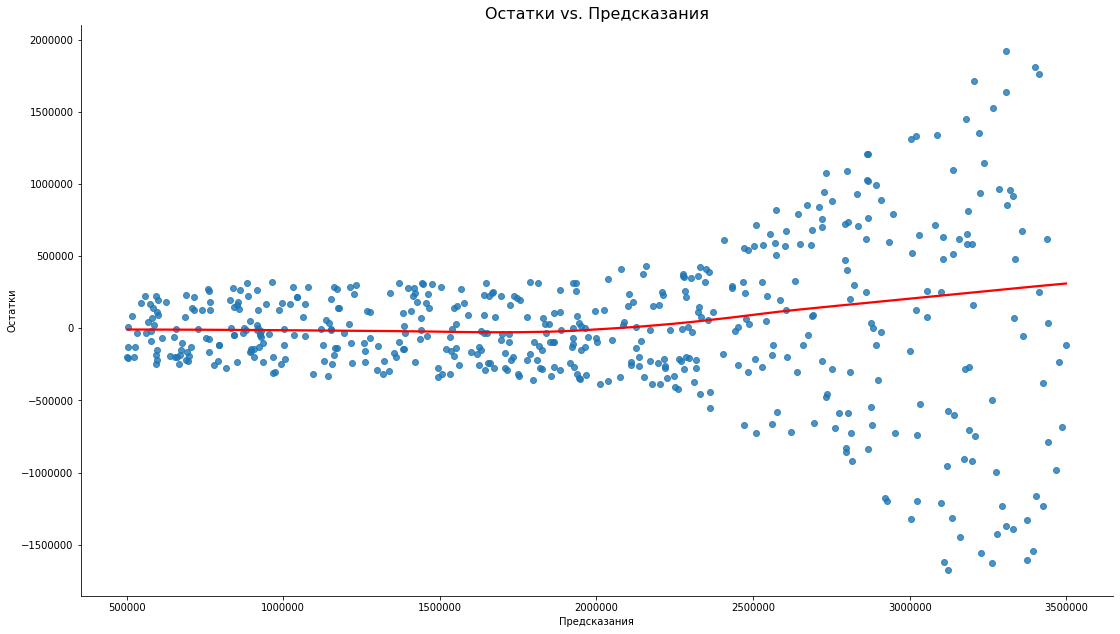

In [11]:
fig, ax = plt.subplots()
sns.regplot(x=y_pred, y=res, lowess=True, ax=ax, line_kws={'color': 'red'})
ax.set_title('Остатки vs. Предсказания', fontsize=16)
ax.set(xlabel='Предсказания', ylabel='Остатки')
fig.set_size_inches(18.5, 10.5)
sns.despine()

Предположения о гомоскедастичности не подтверждено. Это необходимо учитывать при улучшении модели.

Варианты решения:
    - нелинейное преобразование зависимой переменной

Некий вывод о границах применимости:
   - базовые предположения теоремы Гаусса-Маркова о лучшем решение при помощи МНК не выполнено на всех представленных данных
   - нарушение линейности наблюдается на предсказываемых (фактические практически идентично) значениях более 2000000, к сожалению выбросить их нельзя (они составляют примерно половину исходного датасета)
   - можно попробовать улучшить данную модель используя нелинейные преобразования исходных признаков
   
Если говорить конкретно, то данная модель достаточно хорошо предсказывает прибыль меньшую 2000000 принимаю это за адекватную верхнию границу применимости. Коэффициент детерминации 0.84, расчет ниже

In [12]:
df_cut_below = df[df['Прогноз']<=2000000]

In [13]:
r2_score(df_cut_below['Факт'], df_cut_below['Прогноз'])

0.8409790885478238

In [14]:
df_cut_above = df[df['Прогноз']>2000000]

In [15]:
r2_score(df_cut_above['Факт'], df_cut_above['Прогноз'])

0.2338790805539086

Заметим, что на разных частях данных коэффициент детерминации существенно отличается.

### Вопрос 3
При принятии решения открывать или нет новый магазин клиент будет пользоваться полученной моделью, но ясно, что фактическая выручка будет отличаться от прогноза. Можно ли как-то наглядно показать клиенту, что при прогнозе модели Х рублей есть определенный риск получить сильно отличающийся от прогноза факт, а также оценить этот риск?

Как было установлено в предыдущем пункте точность модели очень сильно зависит от величины предсказания. 

Пусть ${X <= 2000000}$

В данной области исходная модель демонстрирует точность в 85%. Таким образов при условии ${X<=2000000}$ истинное значение прибыли будет ${Факт = X \pm 190000}$ с вероятностью 84.7%.  

In [16]:
# Точность урезенной модели 1
1 - mean_squared_error(df_cut_below['Факт'], df_cut_below['Прогноз'], squared=False) / df_cut_below['Прогноз'].mean()

0.8479951533660908

In [17]:
# Среднеквадратичное отклонение модели 1
mean_squared_error(df_cut_below['Факт'], df_cut_below['Прогноз'], squared=False)

189768.71195323343

Пусть ${X >= 2000000}$

В данной области исходная модель демонстрирует точность в 73%. Таким образов при условии ${X>=2000000}$ истинное значение прибыли будет ${Факт = X \pm 720000}$ с вероятностью 73.7%.  
Заметим, что с увеличением предсказанного значения и увеличивается дисперсия (связан с ее гетероскедастичность, показано ранее), таким образов вероятность получения большего убытки или прибыли (что естественно неплохо) увеличивается с увеличением прогноза Х

In [18]:
# Точность урезенной модели 2
1 - mean_squared_error(df_cut_above['Факт'], df_cut_above['Прогноз'], squared=False) / df_cut_above['Прогноз'].mean()

0.7364881404169559

In [19]:
# Среднеквадратичное отклонение модели 2
mean_squared_error(df_cut_above['Факт'], df_cut_above['Прогноз'], squared=False)

718734.2710181166